## Import Necessary Libraries

In [121]:
import matplotlib.pyplot as plt
import seaborn as sns

import sys
import os
from pathlib import Path

project_root = Path(os.getcwd()).resolve()
if not (project_root / "scripts").exists():
    project_root = project_root.parent
sys.path.insert(0, str(project_root))

sys.modules.pop("scripts", None)
sys.modules.pop("scripts.data", None)
sys.modules.pop("scripts.features", None)

scripts_path = project_root / "scripts"
if not scripts_path.exists():
    raise FileNotFoundError(f"scripts/ not found at {scripts_path}")
print("Using project root:", project_root)

from scripts.data.loader import DataLoader
from scripts.features.engineering import FeatureEngineer


Using project root: D:\c drive files\10Academy\fraud-detection-ecommerce-banking


## Load Data 

In [ ]:
loader = DataLoader(data_dir="../data")
fraud_data = loader.load_fraud_data(validate=True)
ip_data = loader.load_ip_country_data()
credit_data = loader.load_credit_data(validate=True)

In [ ]:
engineer = FeatureEngineer()

## Overview of the Data

### fraudulent activities data set

In [3]:
fraud_data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


### IP addresses to countries data set

In [4]:
ip_data.head()

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


In [5]:
credit_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Handle Missing Values

In [ ]:
fraud_data = engineer.handle_missing_values(fraud_data, strategy="median")
credit_data = engineer.handle_missing_values(credit_data, strategy="median")
ip_data = engineer.handle_missing_values(ip_data, strategy="most_frequent")


Fraud Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   user_id         151112 non-null  int64         
 1   signup_time     151112 non-null  datetime64[ns]
 2   purchase_time   151112 non-null  datetime64[ns]
 3   purchase_value  151112 non-null  int64         
 4   device_id       151112 non-null  object        
 5   source          151112 non-null  category      
 6   browser         151112 non-null  category      
 7   sex             151112 non-null  category      
 8   age             151112 non-null  int64         
 9   ip_address      151112 non-null  float64       
 10  class           151112 non-null  int64         
dtypes: category(3), datetime64[ns](2), float64(1), int64(4), object(1)
memory usage: 9.7+ MB

IP Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138846 entries, 0 to 138

In [ ]:
print("Missing values after imputation:")
print("Fraud:", fraud_data.isnull().sum().sum())
print("Credit:", credit_data.isnull().sum().sum())
print("IP:", ip_data.isnull().sum().sum())



Credit Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 

In [ ]:
print("Current data types (preview):")
print(fraud_data.dtypes.head())
print(ip_data.dtypes.head())
print(credit_data.dtypes.head())


Check for missing values in fraud_data
user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64
Check for missing values in credit_data
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
Check for missing values inip_address data
lower_bound_ip_address    0
upper_bound_ip_address    0
country                   0
dtype: int64


Missing values handled via imputation and checks above.

## Data Cleaning

### Duplicate Vaues

In [ ]:
fraud_data = engineer.remove_duplicates(fraud_data)
credit_data = engineer.remove_duplicates(credit_data)
ip_data = engineer.remove_duplicates(ip_data)


Remaining duplicates in fraud_data: 0
Remaining duplicates in credit_data: 0
Remaining duplicates in ip_data: 0


In [ ]:
fraud_data = engineer.coerce_dtypes(
    fraud_data,
    datetime_cols=["signup_time", "purchase_time"],
    categorical_cols=["source", "browser", "sex"],
    numeric_cols=["ip_address"]
)
ip_data = engineer.coerce_dtypes(
    ip_data,
    numeric_cols=["lower_bound_ip_address", "upper_bound_ip_address"]
)


user_id                    int64
signup_time       datetime64[ns]
purchase_time     datetime64[ns]
purchase_value             int64
device_id                 object
source                  category
browser                 category
sex                     category
age                        int64
ip_address               float64
class                      int64
dtype: object


## Exploratory Data Analysis

### Univariant Analysis

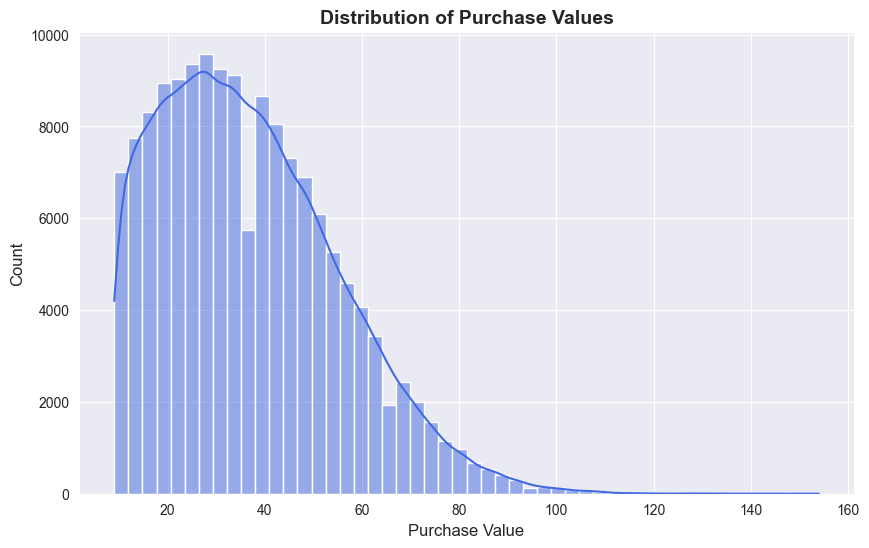

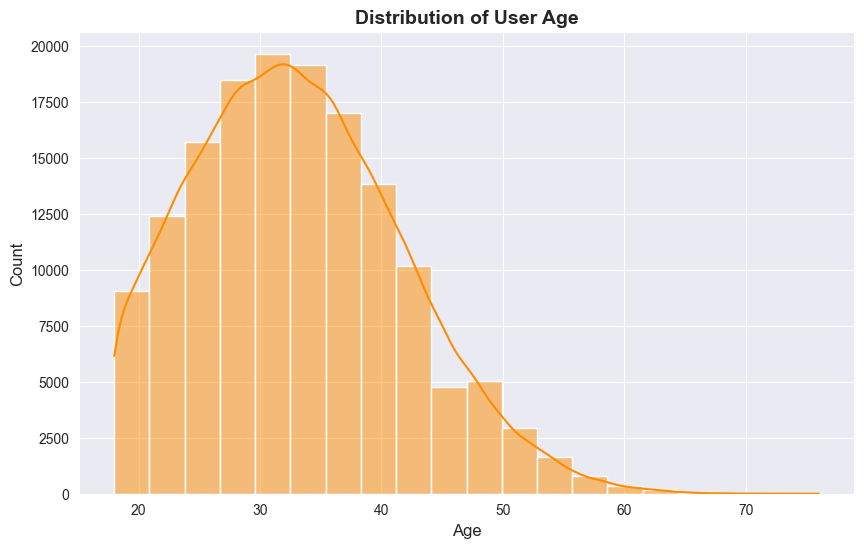

C:\Users\hp\AppData\Local\Temp\ipykernel_1580\703671766.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="class", data=fraud_data, palette=["limegreen", "crimson"])


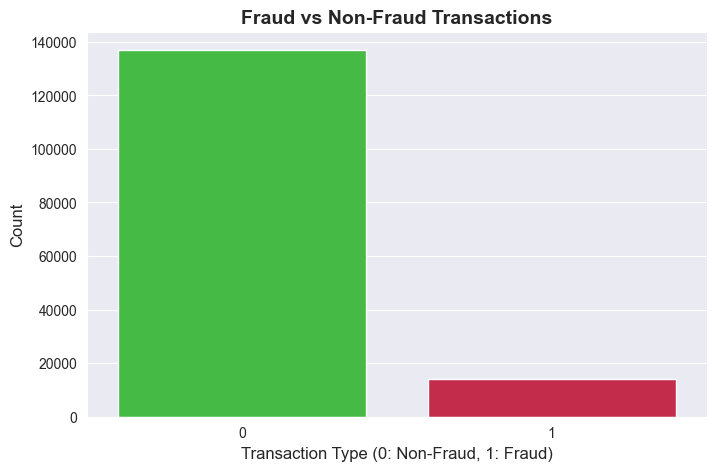

In [ ]:
engineer.plot_univariate(
    fraud_data,
    numeric_cols=["purchase_value", "age"],
    categorical_cols=["class"]
)


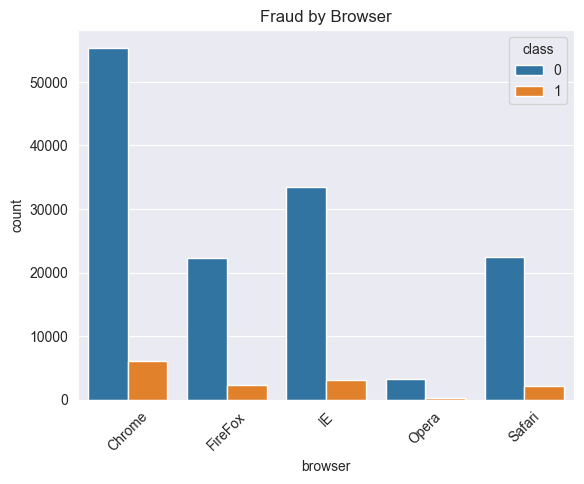

In [ ]:
engineer.plot_bivariate(
    fraud_data,
    target_col="class",
    numeric_cols=["purchase_value", "age"],
    categorical_cols=["browser", "source", "sex"]
)

Multivariant analysis

In [ ]:
fraud_encoded, _ = engineer.encode_categorical_features(
    fraud_data,
    encoding_type="label"
 )
fraud_encoded.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   user_id         151112 non-null  int64         
 1   signup_time     151112 non-null  datetime64[ns]
 2   purchase_time   151112 non-null  datetime64[ns]
 3   purchase_value  151112 non-null  int64         
 4   device_id       151112 non-null  object        
 5   source          151112 non-null  int64         
 6   browser         151112 non-null  int64         
 7   sex             151112 non-null  int64         
 8   age             151112 non-null  int64         
 9   ip_address      151112 non-null  float64       
 10  class           151112 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(7), object(1)
memory usage: 12.7+ MB


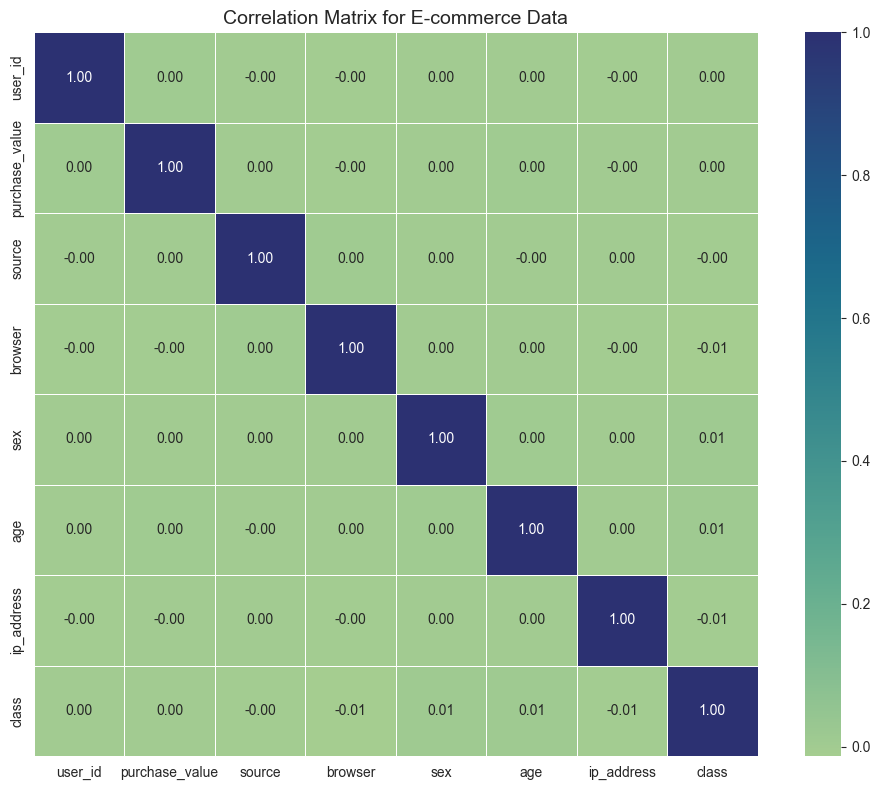

In [ ]:
plt.figure(figsize=(10, 8))

sns.heatmap(
    fraud_encoded.drop(columns=['device_id', 'signup_time', 'purchase_time']).corr(),
    annot=True,
    fmt=".2f",
    cmap='crest',
    linewidths=0.5,
    square=True
)

plt.title('Correlation Matrix for E-commerce Data', fontsize=14)
plt.tight_layout()
plt.show()


### Outlier Detection

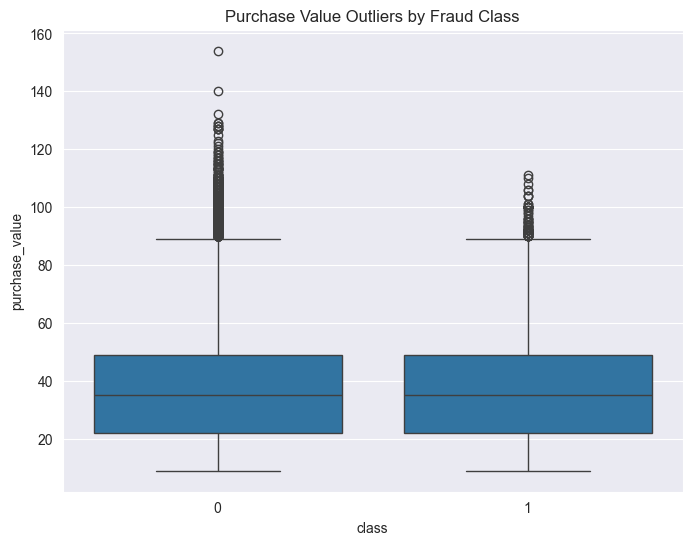

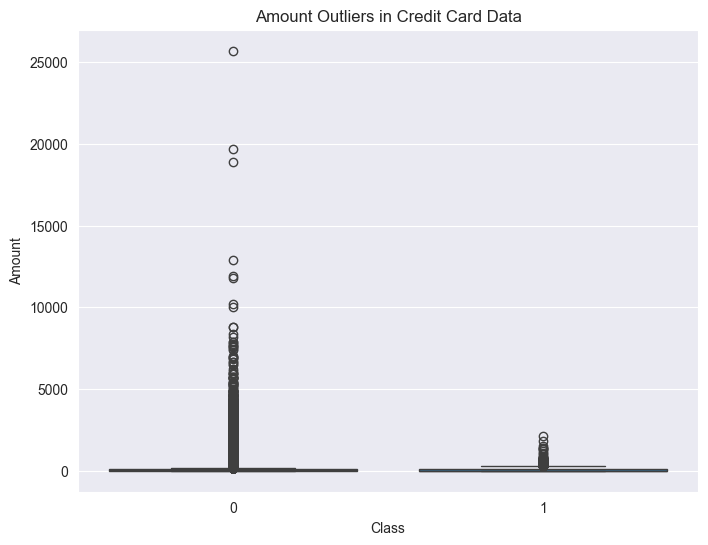

In [20]:

plt.figure(figsize=(8, 6))
sns.boxplot(data=fraud_data, x='class', y='purchase_value')
plt.title('Purchase Value Outliers by Fraud Class')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(data=credit_data, x='Class', y='Amount')
plt.title('Amount Outliers in Credit Card Data')
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_1580\3859114226.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='class', data=fraud_data, palette="Set2")


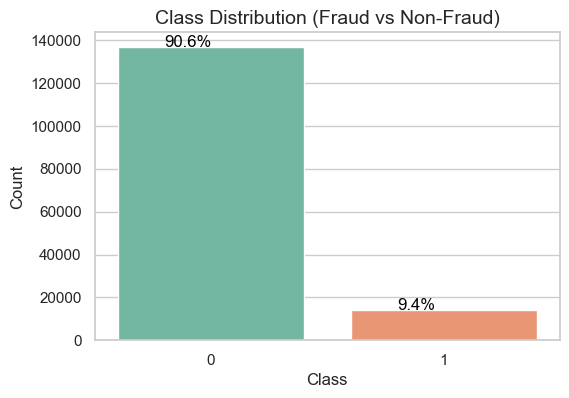

C:\Users\hp\AppData\Local\Temp\ipykernel_1580\3859114226.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Class', data=credit_data, palette="Set2")


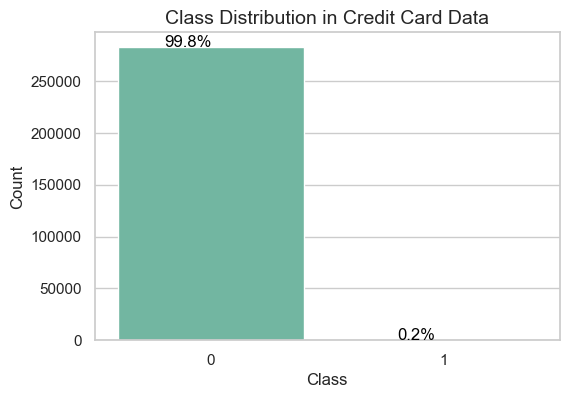

In [21]:

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

plt.figure(figsize=(6, 4))
ax = sns.countplot(x='class', data=fraud_data, palette="Set2")


total = len(fraud_data)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    ax.annotate(percentage, (p.get_x() + 0.2, p.get_height() + 50), fontsize=12, color='black')

plt.title('Class Distribution (Fraud vs Non-Fraud)', fontsize=14)
plt.xlabel('Class', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()


plt.figure(figsize=(6, 4))
ax = sns.countplot(x='Class', data=credit_data, palette="Set2")


total = len(credit_data)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    ax.annotate(percentage, (p.get_x() + 0.2, p.get_height() + 50), fontsize=12, color='black')

plt.title('Class Distribution in Credit Card Data', fontsize=14)
plt.xlabel('Class', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()


### Merge Dataset

In [ ]:
ip_data = engineer.prepare_ip_country_ranges(ip_data)
fraud_data["ip_address_int"] = fraud_data["ip_address"].apply(engineer.convert_ip_to_int)


In [ ]:
fraud_data_geo = engineer.merge_ip_country_range(
    fraud_data,
    ip_data,
    ip_col="ip_address"
 )
fraud_data_geo.head()


In [24]:
fraud_data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,2,0,1,39,73275836879972,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,0,0,0,53,350311387865908,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,2,3,1,53,262147382011095,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,2,4,1,41,384054244391396,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,0,4,1,45,415583117452712,0


In [ ]:
fraud_data_geo.isnull().sum().head()


In [ ]:
fraud_data_geo.shape, ip_data.shape

,country,lower_bound_ip_address_int,upper_bound_ip_address_int
0,Australia,167772160,16777471
1,China,167774720,16777727
2,China,167777280,16778239
3,Australia,167782400,16779263
4,China,167792640,16781311


In [ ]:
fraud_data_combined = fraud_data_geo.dropna()
fraud_data_combined.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,lower_bound_ip_address_int,upper_bound_ip_address_int
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,2,0,1,39,73275836879972,0,Australia,167772160.0,16777471.0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,0,0,0,53,350311387865908,0,China,167774720.0,16777727.0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,2,3,1,53,262147382011095,1,China,167777280.0,16778239.0
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,2,4,1,41,384054244391396,0,Australia,167782400.0,16779263.0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,0,4,1,45,415583117452712,0,China,167792640.0,16781311.0


In [ ]:
fraud_data.shape, fraud_data_geo.shape

((151112, 11), (138846, 3))

In [ ]:
fraud_data_combined.isnull().sum()

user_id                           0
signup_time                       0
purchase_time                     0
purchase_value                    0
device_id                         0
source                            0
browser                           0
sex                               0
age                               0
ip_address                        0
class                             0
country                       12266
lower_bound_ip_address_int    12266
upper_bound_ip_address_int    12266
dtype: int64

In [ ]:
fraud_data_combined = fraud_data_combined.dropna()

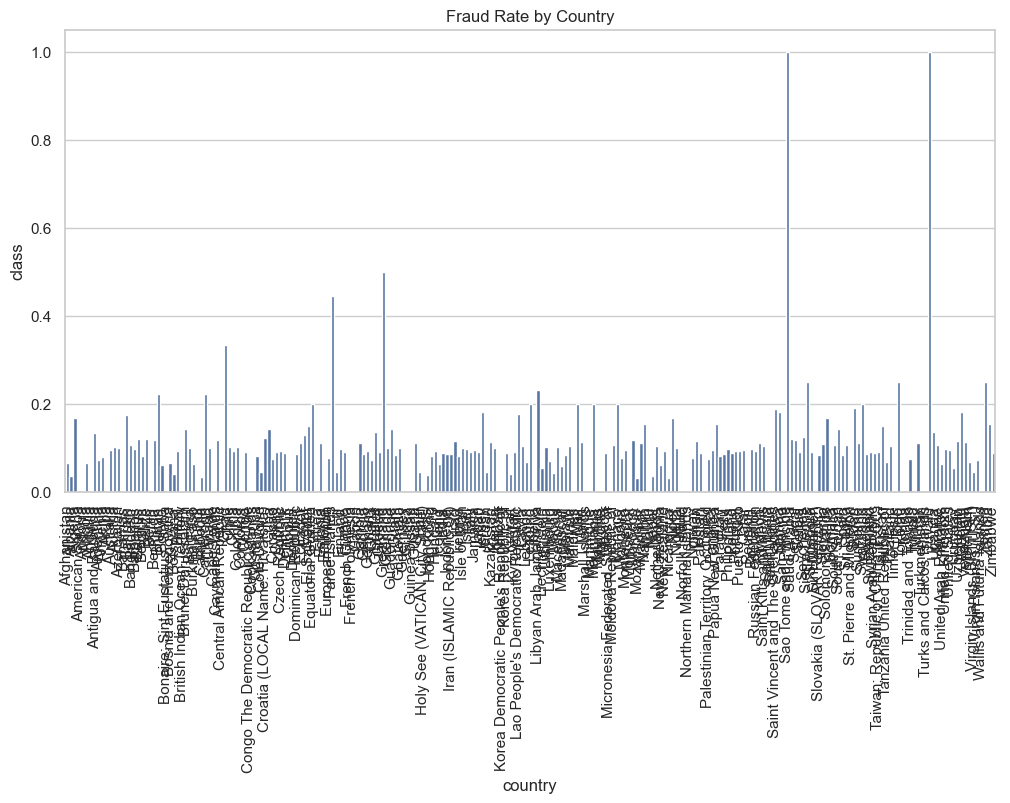

In [31]:

plt.figure(figsize=(12, 6))
country_fraud = fraud_data_combined.groupby('country')['class'].mean().reset_index()
sns.barplot(x='country', y='class', data=country_fraud)
plt.title('Fraud Rate by Country')
plt.xticks(rotation=90)
plt.show()

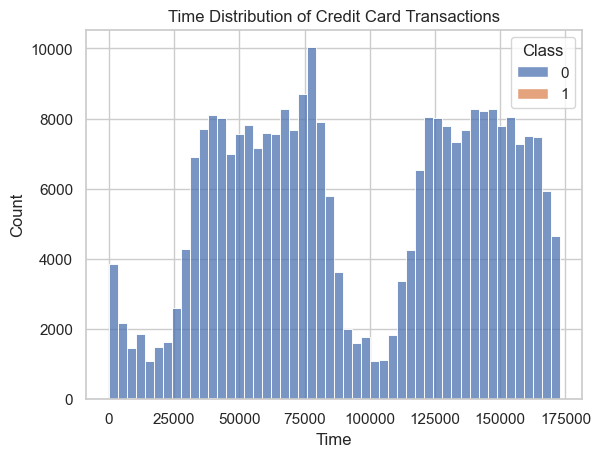

In [32]:
# Time analysis in credit card data
sns.histplot(credit_data, x='Time', hue='Class', multiple='stack', bins=50)
plt.title('Time Distribution of Credit Card Transactions')
plt.show()

## Feature Engineering

In [ ]:
fraud_data_geo = engineer.create_transaction_velocity_features(
    fraud_data_geo,
    user_col="user_id",
    time_col="purchase_time",
    amount_col="purchase_value"
 )
fraud_data_geo = engineer.create_time_features(
    fraud_data_geo,
    time_col="purchase_time"
 )
fraud_data_geo["signup_purchase_diff"] = (
    fraud_data_geo["purchase_time"] - fraud_data_geo["signup_time"]
 ).dt.total_seconds()


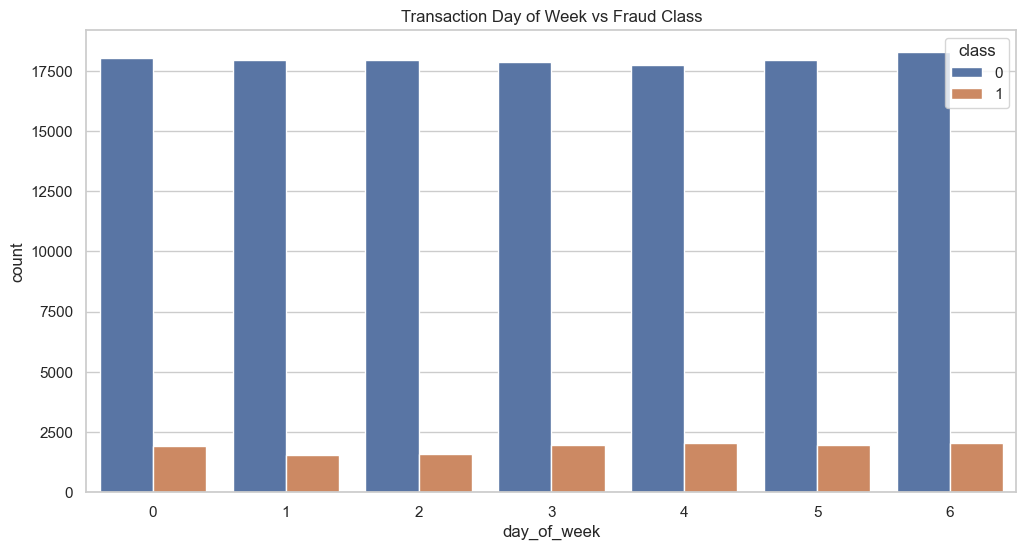

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='day_of_week', hue='class', data=fraud_data_geo)
plt.title('Transaction Day of Week vs Fraud Class')
plt.show()


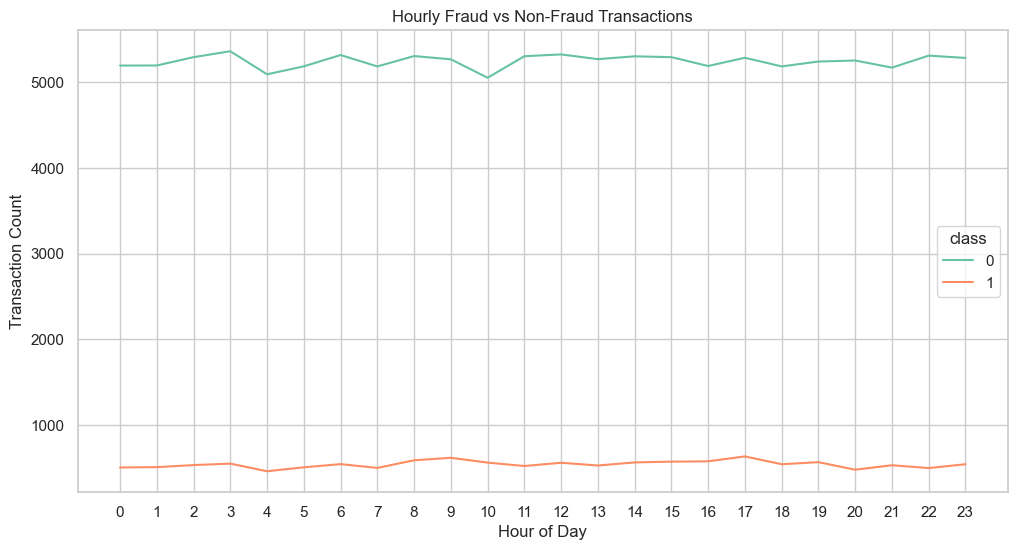

In [ ]:
fraud_data_geo.loc[:, 'hour_of_day'] = fraud_data_geo['purchase_time'].dt.hour

plt.figure(figsize=(12, 6))

hourly_counts = fraud_data_geo.groupby(['hour_of_day', 'class']).size().reset_index(name='count')

sns.lineplot(x='hour_of_day', y='count', hue='class', data=hourly_counts, palette='Set2')

plt.title('Hourly Fraud vs Non-Fraud Transactions')
plt.xlabel('Hour of Day')
plt.ylabel('Transaction Count')
plt.xticks(range(0, 24))
plt.show()


In [ ]:
fraud_data_geo = engineer.scale_numeric_columns(
    fraud_data_geo,
    ["purchase_value", "signup_purchase_diff"]
 )


In [ ]:
fraud_data_combined, _ = engineer.encode_categorical_features(
    fraud_data_geo,
    encoding_type="label"
 )
fraud_data_combined.head()


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,lower_bound_ip_address_int,upper_bound_ip_address_int,signup_purchase_diff,transaction_count,day_of_week,hour_of_day
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,-0.159776,QVPSPJUOCKZAR,2,0,1,39,73275836879972,0,11,167772160.0,16777471.0,-0.136131,1,5,2
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,-1.142137,EOGFQPIZPYXFZ,0,0,0,53,350311387865908,0,42,167774720.0,16777727.0,-1.571694,1,0,1
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,-1.196713,YSSKYOSJHPPLJ,2,3,1,53,262147382011095,1,42,167777280.0,16778239.0,-1.577432,1,3,18
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,0.385981,ATGTXKYKUDUQN,2,4,1,41,384054244391396,0,11,167782400.0,16779263.0,-1.420057,1,0,13
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,0.113102,NAUITBZFJKHWW,0,4,1,45,415583117452712,0,42,167792640.0,16781311.0,-0.182575,1,2,18


In [43]:
fraud_data_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 138846 entries, 0 to 138845
Data columns (total 18 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   user_id                     138846 non-null  int64         
 1   signup_time                 138846 non-null  datetime64[ns]
 2   purchase_time               138846 non-null  datetime64[ns]
 3   purchase_value              138846 non-null  float64       
 4   device_id                   138846 non-null  object        
 5   source                      138846 non-null  int64         
 6   browser                     138846 non-null  int64         
 7   sex                         138846 non-null  int64         
 8   age                         138846 non-null  int64         
 9   ip_address                  138846 non-null  int64         
 10  class                       138846 non-null  int64         
 11  country                     138846 non-null 

In [44]:
fraud_data_combined['device_id'].nunique()

127281

In [45]:
fraud_data_combined['country'].nunique()

235

In [47]:
fraud_data_combined.to_csv('../data/fraud_data_combined.csv', index=False, encoding='utf-8')

In [48]:
credit_data.to_csv('../data/credit_cleaned_data_2.csv', index=False, encoding='utf-8')